In [7]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the datetime module from the datetime library.
from datetime import datetime
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the API key.
from config import weather_api_key
# Import the requests library.
import requests

In [8]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

655

In [12]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

staryy nadym ru
sandur fo
vaini to
kiunga pg
zhigansk ru
palabuhanratu id
dikson ru
ushuaia ar
husavik is
halalo wf
ushuaia ar
omutinskoye ru
pundaguitan ph
salalah om
bukachacha ru
hithadhoo mv
sibu my
salalah om
georgetown sh
rikitea pf
maniitsoq gl
tabas ir
kumba cm
albany au
luba gq
castro cl
faya td
pascagoula us
taolanaro mg
chokurdakh ru
bredasdorp za
simao dias br
hilo us
port-gentil ga
arandis na
tual id
cidreira br
punta arenas cl
rikitea pf
santa isabel do rio negro br
pangnirtung ca
hamilton bm
alor setar my
naze jp
tuktoyaktuk ca
ribeira grande pt
albany au
ushuaia ar
hilo us
te anau nz
cape town za
ponta do sol cv
nanortalik gl
mataura pf
thompson ca
lisala cd
nikolskoye ru
mar del plata ar
amderma ru
port alfred za
amahai id
presidencia roque saenz pena ar
chabahar ir
kavieng pg
vidim ru
umzimvubu za
saint anthony ca
talnakh ru
georgetown sh
mataura pf
vaini to
nikolskoye ru
butaritari ki
east london za
souillac mu
rikitea pf
jabinyanah tn
kambove cd
likasi cd
jamestown 

port elizabeth za
cherskiy ru
dalvik is
bluff nz
narsaq gl
tabiauea ki
bluff nz
belushya guba ru
cape town za
hermanus za
taolanaro mg
victoria sc
progreso mx
ushuaia ar
ilulissat gl
butaritari ki
taolanaro mg
daru pg
macomb us
hithadhoo mv
hermanus za
hilo us
vaini to
butaritari ki
punta arenas cl
puerto ayora ec
mugumu tz
chicama pe
mahebourg mu
mount isa au
ngunguru nz
vila vu
honiara sb
bredasdorp za
college us
megion ru
hobart au
san jose uy
podgorica me
broken hill au
rawannawi ki
pocatello us
bluff nz
bredasdorp za
cockburn town tc
qaanaaq gl
port hueneme us
prince rupert ca
puerto ayora ec
hami cn
atuona pf
castro cl
saint-philippe re
saint george bm
san policarpo ph
east london za
wanning cn
hermanus za
kaitangata nz
mezen ru
hilo us
barrow us
matamoros mx
yamada jp
albany au
andevoranto mg
semey kz
kahului us
tura ru
punta arenas cl
mount isa au
swan hill au
rottingdean gb
ushuaia ar
simeykyne ua
staroshcherbinovskaya ru
dikson ru
port elizabeth za
souillac mu
kaeo nz
tasiila

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | staryy nadym
Processing Record 2 of Set 1 | sandur
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | kiunga
Processing Record 5 of Set 1 | zhigansk
Processing Record 6 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 7 of Set 1 | dikson
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | husavik
Processing Record 10 of Set 1 | halalo
City not found. Skipping...
Processing Record 11 of Set 1 | omutinskoye
City not found. Skipping...
Processing Record 12 of Set 1 | pundaguitan
Processing Record 13 of Set 1 | salalah
Processing Record 14 of Set 1 | bukachacha
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | sibu
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | maniitsoq
Processing Record 20 of Set 1 | tabas
Processing Record 21 of Set 1 | kumba
Processi

Processing Record 37 of Set 4 | nioro
Processing Record 38 of Set 4 | coahuayana
Processing Record 39 of Set 4 | ondorhaan
City not found. Skipping...
Processing Record 40 of Set 4 | codrington
Processing Record 41 of Set 4 | bannu
Processing Record 42 of Set 4 | borujerd
Processing Record 43 of Set 4 | vardo
Processing Record 44 of Set 4 | ishigaki
Processing Record 45 of Set 4 | kahului
Processing Record 46 of Set 4 | olafsvik
Processing Record 47 of Set 4 | manjeshwar
Processing Record 48 of Set 4 | wendo
Processing Record 49 of Set 4 | yulara
Processing Record 50 of Set 4 | hasaki
Processing Record 1 of Set 5 | tongliao
Processing Record 2 of Set 5 | caruray
Processing Record 3 of Set 5 | itarema
Processing Record 4 of Set 5 | santa maria
Processing Record 5 of Set 5 | eydhafushi
Processing Record 6 of Set 5 | guerrero negro
Processing Record 7 of Set 5 | arraial do cabo
Processing Record 8 of Set 5 | tessalit
Processing Record 9 of Set 5 | avarua
Processing Record 10 of Set 5 | na

Processing Record 26 of Set 8 | luwuk
Processing Record 27 of Set 8 | hunza
City not found. Skipping...
Processing Record 28 of Set 8 | jacqueville
Processing Record 29 of Set 8 | halifax
Processing Record 30 of Set 8 | iqaluit
Processing Record 31 of Set 8 | djibo
Processing Record 32 of Set 8 | belaya gora
Processing Record 33 of Set 8 | sydney mines
Processing Record 34 of Set 8 | aurora
Processing Record 35 of Set 8 | gerardmer
Processing Record 36 of Set 8 | hay river
Processing Record 37 of Set 8 | tangua
Processing Record 38 of Set 8 | waipawa
Processing Record 39 of Set 8 | ajdabiya
Processing Record 40 of Set 8 | san vicente de canete
Processing Record 41 of Set 8 | komsomolskiy
Processing Record 42 of Set 8 | malpur
Processing Record 43 of Set 8 | san lorenzo
Processing Record 44 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 45 of Set 8 | diamantino
Processing Record 46 of Set 8 | fortuna
Processing Record 47 of Set 8 | severo-kurilsk
Processing Record 48 

Processing Record 13 of Set 12 | mana
Processing Record 14 of Set 12 | muheza
Processing Record 15 of Set 12 | perth
Processing Record 16 of Set 12 | spassk
Processing Record 17 of Set 12 | kurilsk
Processing Record 18 of Set 12 | bambous virieux
Processing Record 19 of Set 12 | sfantu gheorghe
Processing Record 20 of Set 12 | bronnoysund
Processing Record 21 of Set 12 | havre-saint-pierre
Processing Record 22 of Set 12 | khani
Processing Record 23 of Set 12 | knysna
Processing Record 24 of Set 12 | necochea
Processing Record 25 of Set 12 | saryg-sep
Processing Record 26 of Set 12 | bodden town
Processing Record 27 of Set 12 | derzhavinsk
Processing Record 28 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 29 of Set 12 | labuhan
Processing Record 30 of Set 12 | ossora
Processing Record 31 of Set 12 | jining
Processing Record 32 of Set 12 | bikaner
Processing Record 33 of Set 12 | houma
Processing Record 34 of Set 12 | buenos aires
Processing Record 35 of Set 12 | springbok
Proc

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Staryy Nadym,RU,2021-09-09 05:59:11,65.6118,72.6842,50.72,49,10,10.67
1,Sandur,IN,2021-09-09 05:59:11,15.1000,76.5500,79.52,66,93,19.69
2,Vaini,TO,2021-09-09 05:59:11,-21.2000,-175.2000,69.96,94,90,11.50
3,Kiunga,PG,2021-09-09 05:59:12,-6.1219,141.2906,80.17,91,98,4.81
4,Zhigansk,RU,2021-09-09 05:59:12,66.7697,123.3711,54.77,56,52,3.13
5,Dikson,RU,2021-09-09 05:59:13,73.5069,80.5464,41.81,87,72,13.09
6,Ushuaia,AR,2021-09-09 05:59:13,-54.8000,-68.3000,40.66,87,20,6.91
7,Husavik,IS,2021-09-09 05:59:13,66.0449,-17.3389,48.11,72,2,8.77
8,Pundaguitan,PH,2021-09-09 05:59:14,6.3711,126.1689,85.28,69,97,16.80
9,Salalah,OM,2021-09-09 05:59:14,17.0151,54.0924,80.01,88,100,9.06


In [15]:
import csv
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

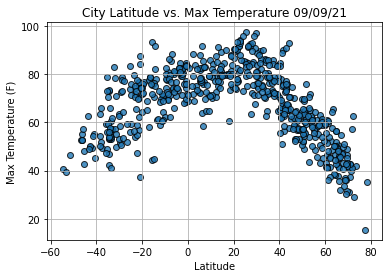

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

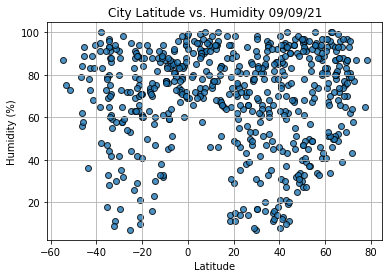

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

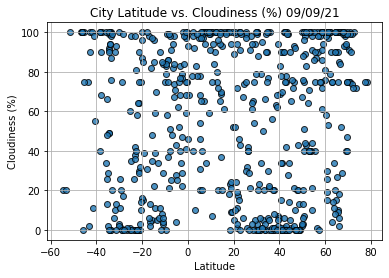

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

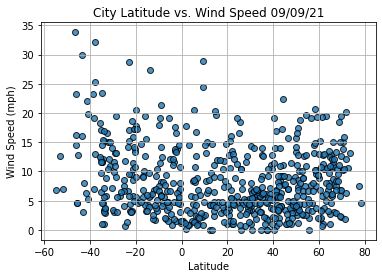

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [31]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [33]:
index13 = city_data_df.loc[13]
index13

City                   Georgetown
Country                        MY
Date          2021-09-09 05:58:06
Lat                        5.4112
Lng                      100.3354
Max Temp                    87.73
Humidity                       74
Cloudiness                     20
Wind Speed                   3.44
Name: 13, dtype: object

In [34]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4       True
       ...  
595     True
596     True
597     True
598     True
599     True
Name: Lat, Length: 600, dtype: bool

In [35]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Staryy Nadym,RU,2021-09-09 05:59:11,65.6118,72.6842,50.72,49,10,10.67
1,Sandur,IN,2021-09-09 05:59:11,15.1000,76.5500,79.52,66,93,19.69
4,Zhigansk,RU,2021-09-09 05:59:12,66.7697,123.3711,54.77,56,52,3.13
5,Dikson,RU,2021-09-09 05:59:13,73.5069,80.5464,41.81,87,72,13.09
7,Husavik,IS,2021-09-09 05:59:13,66.0449,-17.3389,48.11,72,2,8.77


In [45]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

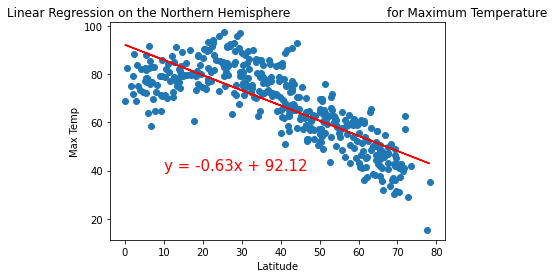

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

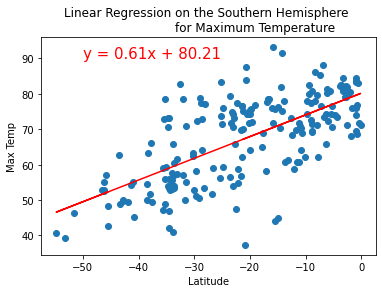

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))



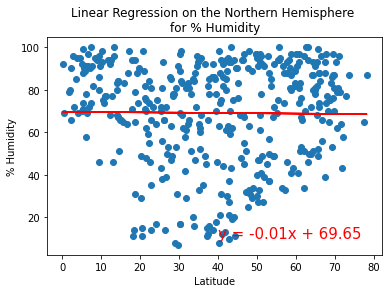

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

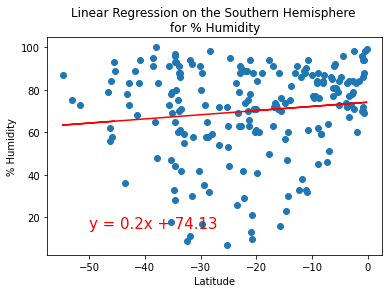

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

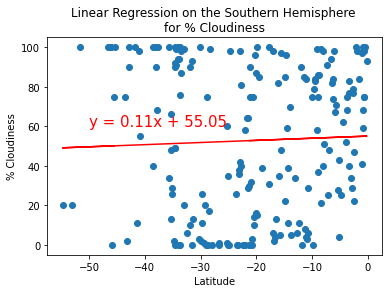

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

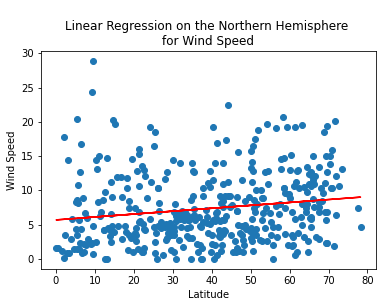

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

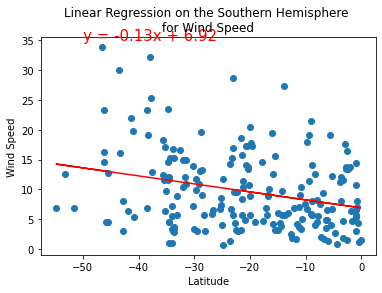

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))